# SHD Dataset analysis
Here we go through the varied weight initialization conditions and the resulting metrics and analysis when trained on the SHD dataset. This is exclusively used in analysis shown in figures 2d (accuracy) and 5d-f (Van Rossum)

In [1]:
from analysisUtil import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

ratios = [50,80,90,95,100]

In [2]:
params = []
accs = []
dfAct = pd.read_csv('combinedEIData_SHD.csv')
for t in range(100,244):
    for e in ['050','080','090','095','100']:
        simTag = 'SHD_'+str(e)+'_'+str(t)
        try:
            param = getWeightFromUniqueId(simTag+'_surrParams', objFolder='/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams')
            acc = getWeightFromUniqueId(simTag+'_accList', objFolder='/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList')
            params.append(param)
            accs.append(acc)
        except:
            print('MISSING: '+simTag)

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_090_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_090_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SH

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_135_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_090_135_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_090_135_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_135_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_135_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_135_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_135_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_136_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_136_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_090_170_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_090_170_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_170_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_170_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_170_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_170_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_171_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_171_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_171_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SH

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_210_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_210_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_210_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_090_210_surrParams
MISSING: SHD_090_210
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_210_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_210_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_210_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_210_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_211_surrParams
attempting to load:/media/adamlab/My Passport/LIF

In [3]:
vars(params[0])

{'version': 1.2,
 'simTag': 'SHD_050_100',
 'debug': False,
 'data_set': 'SHD',
 'nb_inputs': 700,
 'nb_hidden': 200,
 'excHidRat': 0.5,
 'nb_outputs': 20,
 'time_step': 0.001,
 'nb_steps': 100,
 'batch_size': 256,
 'nb_epochs': 200,
 'start_epoch': None,
 'lr': 0.001,
 'tau_mem': 0.005,
 'tau_syn': 0.005,
 'vRest': 0.0,
 'vPeak': 1.0,
 'alpha': 0.8187307530779818,
 'beta': 0.8187307530779818,
 'sparse_w1': True,
 'sparse_w2': True,
 'sparsity_w1': 0.0,
 'sparsity_w2': 0.0,
 'std_w1': 5e-05,
 'std_w2': 0.0001,
 'spike_fn': <bound method Function.apply of <class 'SurrGradSpikeLIF.SurrGradSpikeLIF'>>,
 'isIZ': False,
 'C': None,
 'k': None,
 'vMin': None,
 'vThresh': None,
 'a': None,
 'b': None,
 'd': None,
 'isExc': None,
 'isNoisy': False,
 'w1NoiseSTD': 0.0,
 'w2NoiseSTD': 0.0}

In [4]:
stds = []
for i in range(len(params)):
    if params[i].std_w1 not in stds:
        stds.append(params[i].std_w1)
print(stds)
print(len(stds))

[5e-05, 7.5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.00015, 0.00025, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.003]
18


In [5]:
dfAct

,Unnamed: 0,epoch,version,simTag,debug,data_set,nb_inputs,nb_hidden,excHidRat,nb_outputs,...,excActAvg_c16,inhActAvg_c16,excActAvg_c17,inhActAvg_c17,excActAvg_c18,inhActAvg_c18,excActAvg_c19,inhActAvg_c19,maxAcc,minLoss
0,0,-1,1.2,SHD_050_100,False,SHD,700,200,0.5,20,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.046387,2.995732
1,1,0,1.2,SHD_050_100,False,SHD,700,200,0.5,20,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.046387,2.995732
2,2,1,1.2,SHD_050_100,False,SHD,700,200,0.5,20,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.046387,2.995732
3,3,10,1.2,SHD_050_100,False,SHD,700,200,0.5,20,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.046387,2.995732
4,4,100,1.2,SHD_050_100,False,SHD,700,200,0.5,20,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.046387,2.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771,6771,199,1.2,SHD_100_243,False,SHD,700,200,1.0,20,...,2833.413793,0.0,4507.904762,0.0,2537.027431,0.0,3832.557178,0.0,0.046387,2.995732
6772,6772,20,1.2,SHD_100_243,False,SHD,700,200,1.0,20,...,2830.873134,0.0,4500.091811,0.0,2539.012755,0.0,3833.004890,0.0,0.046387,2.995732
6773,6773,30,1.2,SHD_100_243,False,SHD,700,200,1.0,20,...,2836.896040,0.0,4488.522843,0.0,2541.022500,0.0,3831.367150,0.0,0.046387,2.995732
6774,6774,5,1.2,SHD_100_243,False,SHD,700,200,1.0,20,...,2837.418953,0.0,4509.912281,0.0,2538.174564,0.0,3830.405868,0.0,0.046387,2.995732


In [6]:
colors = ['#0A2F51','#0E4D64','#137177','#188977','#1D9A6C','#39A96B','#56B870','#74C67A','#99D492','#BFE1B0','#DEEDCF']

In [7]:
accData = {}
for r in ratios:
    accData[r] = {}
    for std in stds:
        accData[r][std] = []

for i in range(len(params)):
    accData[params[i].excHidRat*100][params[i].std_w1].append( (sum(accs[i][-25:])/25))

# SHD Accuracy (Fig 1d)

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_101_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_102_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_103_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_104_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_105_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_113_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_106_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_107_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_108_accList


attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_211_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_212_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_213_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_214_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_215_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_216_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_217_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_218_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_219_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_220_accList


attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_239_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_241_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_242_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_243_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_102_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_103_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_104_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_105_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_106_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_107_accList


attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_206_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_207_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_208_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_209_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_210_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_211_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_212_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_213_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_214_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_215_accList


attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_167_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_168_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_170_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_171_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_105_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_172_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_173_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_174_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_153_accList


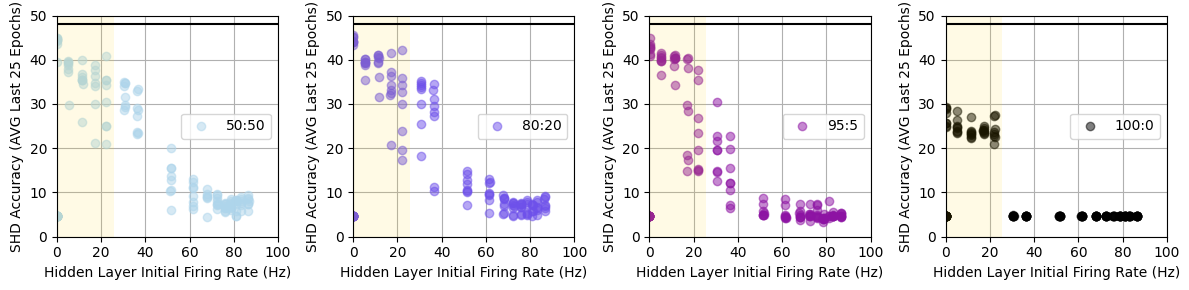

In [8]:
colorDefs = {
    50: '#BEBBEC',  # light lavender
    70: '#BA94D8',  # lavender
    75: '#BF72BB',  # rich lavender
    80: '#8E4198',  # dark lavender
    90: '#442F8E',  # deep lavender
    95: '#204B80', # dark purple
    100: '#000000'   # Black
}
colorDefs = {
1.00:'#000000',
 .95:'#8D13A3',
 .90:'#7C2ED1',
 .80:'#6E51EA',
 .75:'#727CE8',
 .70:'#91B1E8',
 .50:'#AED5EB'
}

fig, axs = plt.subplots(1,4, figsize=(12,3))
pltNum = 0
for r in [0.5,0.8,0.95,1.0]:
    x = []
    y = []
    for i in range(len(dfAct)):
        if(dfAct['epoch'].values[i]!=-1): continue
        if(dfAct['excHidRat'].values[i]!=r): continue
        actAvg = 0
        for c in range(20):
            actAvg+=dfAct['excActAvg_c'+str(c)].values[i]
            actAvg+=dfAct['inhActAvg_c'+str(c)].values[i]
        actAvg = actAvg/20
        actAvg = actAvg/200 / 0.2
        x.append(actAvg)
        
        acc = getWeightFromUniqueId(dfAct['simTag'].values[i]+'_accList', objFolder='/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList')
        
        y.append(sum(acc[-25:])/len(acc[-25:]))

    axs[pltNum].scatter(x,[t*100 for t in y], color=colorDefs[r], label='{:d}:{:d}'.format(int(r*100),100-int(r*100)), alpha=0.5)
    
    axs[pltNum].grid()
    axs[pltNum].legend(loc=7)
    axs[pltNum].plot([0,100],[48.1,48.1],color='black')
    axs[pltNum].set_ylim(0,50)
    axs[pltNum].set_xlim(0,100)
    axs[pltNum].set_ylabel('SHD Accuracy (AVG Last 25 Epochs)')
    axs[pltNum].set_xlabel('Hidden Layer Initial Firing Rate (Hz)')
    axs[pltNum].axvspan(0, 25.6, color='gold', alpha=0.1, lw=0)
    #axs[pltNum].set_xticks([0.0000,0.0002,0.0004,0.0006,0.0008,0.001])
    #axs[pltNum].set_xticklabels(['0.0000','0.0002','0.0004','0.0006','0.0008','0.001'],rotation=30)
    axs[pltNum]
    axs[pltNum].set_axisbelow(True)
    
    pltNum+=1
plt.tight_layout()
plt.savefig('./SHD_accuracy/acc_actV07_SR.svg', bbox_inches='tight')

# Van Rossum Distances (Fig 5d-f)


In [9]:
df = pd.read_csv('vanRossumDistanceData_SHD_VRD_fix.csv')
df

,Unnamed: 0,e-e_avg,e-i_avg,i-i_avg,e-e_std,e-i_std,i-i_std,simTag,epoch
0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,SHD_050_100,-1
1,1,0.000000,0.0,0.0,0.000000,0.0,0.0,SHD_050_100,199
2,2,0.000000,0.0,0.0,0.000000,0.0,0.0,SHD_050_101,-1
3,3,0.000000,0.0,0.0,0.000000,0.0,0.0,SHD_050_101,199
4,4,0.000000,0.0,0.0,0.000000,0.0,0.0,SHD_050_102,-1
...,...,...,...,...,...,...,...,...,...
1105,1105,33.912098,NaN,NaN,10.075631,NaN,NaN,SHD_100_241,199
1106,1106,31.071272,NaN,NaN,10.539774,NaN,NaN,SHD_100_242,-1
1107,1107,34.182247,NaN,NaN,11.126543,NaN,NaN,SHD_100_242,199
1108,1108,37.275842,NaN,NaN,12.462860,NaN,NaN,SHD_100_243,-1


In [10]:
eePre = {0.5:[],0.8:[],0.90:[],0.95:[]}
eiPre = {0.5:[],0.8:[],0.90:[],0.95:[]}
iiPre = {0.5:[],0.8:[],0.90:[],0.95:[]}
eeSuccess = {0.5:[],0.8:[],0.90:[],0.95:[]}
eiSuccess = {0.5:[],0.8:[],0.90:[],0.95:[]}
iiSuccess = {0.5:[],0.8:[],0.90:[],0.95:[]}
eeFailure = {0.5:[],0.8:[],0.90:[],0.95:[]}
eiFailure = {0.5:[],0.8:[],0.90:[],0.95:[]}
iiFailure = {0.5:[],0.8:[],0.90:[],0.95:[]}
avgAccInit = {0.5:[],0.8:[],0.90:[],0.95:[]}
avgAccSuccess = {0.5:[],0.8:[],0.90:[],0.95:[]}
avgAccFailure = {0.5:[],0.8:[],0.90:[],0.95:[]}

def calcFix(d):
    # the origianl distance calculations were wrong
    #  but the fix for these missed the final step of dividing
    #  the sum of avg batch distance by the number of batches
    return d / 30

import math
for i in range(len(df)):
    param = getWeightFromUniqueId(df['simTag'].values[i]+'_surrParams', objFolder='/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams')
    acc = getWeightFromUniqueId(df['simTag'].values[i]+'_accList', objFolder='/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList')
    if(math.isnan(df['i-i_avg'].values[i])): continue
    if(df['epoch'].values[i]==-1): 
        eePre[param.excHidRat].append(calcFix(df['e-e_avg'].values[i]))
        eiPre[param.excHidRat].append(calcFix(df['e-i_avg'].values[i]))
        iiPre[param.excHidRat].append(calcFix(df['i-i_avg'].values[i]))
    if(df['epoch'].values[i]!=199): continue
    if(sum(acc[-25:])/25 > 0.3):
        eeSuccess[param.excHidRat].append(calcFix(df['e-e_avg'].values[i]))
        eiSuccess[param.excHidRat].append(calcFix(df['e-i_avg'].values[i]))
        iiSuccess[param.excHidRat].append(calcFix(df['i-i_avg'].values[i]))
        avgAccSuccess[param.excHidRat].append(sum(acc[-25:])/25)
        avgAccInit[param.excHidRat].append(acc[0])
    else:
        eeFailure[param.excHidRat].append(calcFix(df['e-e_avg'].values[i]))
        eiFailure[param.excHidRat].append(calcFix(df['e-i_avg'].values[i]))
        iiFailure[param.excHidRat].append(calcFix(df['i-i_avg'].values[i]))
        avgAccFailure[param.excHidRat].append(sum(acc[-25:])/25)
        avgAccInit[param.excHidRat].append(acc[0])

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_100_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_100_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_101_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_101_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_101_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_101_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_102_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SH

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_177_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_178_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_178_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_178_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_178_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_179_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_179_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_050_180_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_050_180_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_129_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_129_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_129_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_130_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_130_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_130_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_130_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_131_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_131_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_211_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_212_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_212_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_212_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_212_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_213_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_213_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_080_213_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_080_213_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_164_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_164_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_164_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_165_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_165_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_165_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_165_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_095_166_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_095_166_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_106_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_106_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_107_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_107_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_108_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_108_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_108_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_108_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_109_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SH

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_182_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_183_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_183_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_183_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_183_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_184_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_184_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surrParams/SHD_100_184_surrParams
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_accList/SHD_100_184_accList
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/SHD/SHD_surr

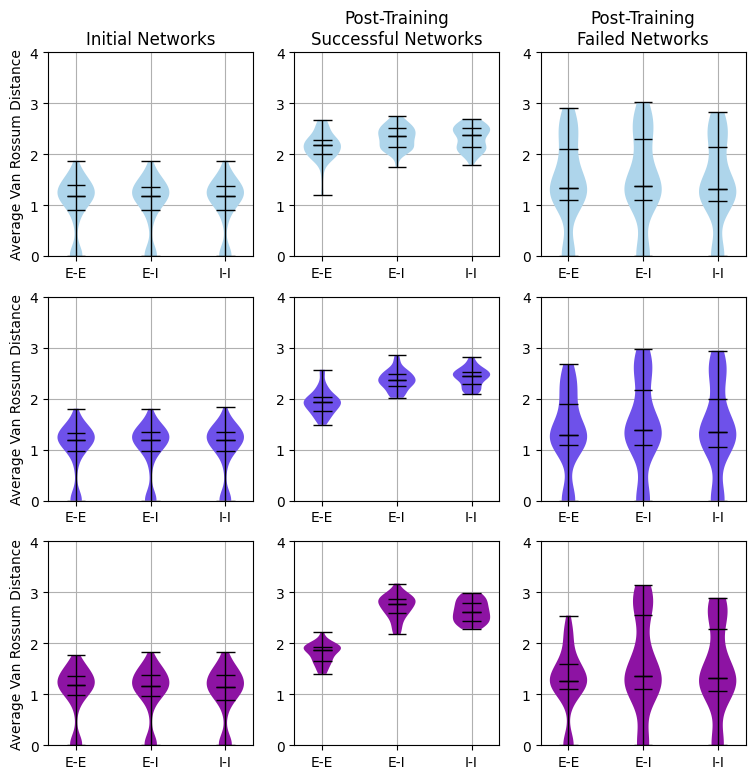

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(9,9))
colorDefs ={
1.00:'#000000',
 .95:'#8D13A3',
 .90:'#7C2ED1',
 .80:'#6E51EA',
 .75:'#727CE8',
 .70:'#91B1E8',
 .50:'#AED5EB'
}
row=0
for ratio in [0.5,0.8,0.95]:
    color = colorDefs[ratio]
    parts = axs[row][0].violinplot([eePre[ratio],eiPre[ratio], iiPre[ratio]], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
        
    parts = axs[row][1].violinplot([eeSuccess[ratio],eiSuccess[ratio], iiSuccess[ratio]], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
        
    parts = axs[row][2].violinplot([eeFailure[ratio],eiFailure[ratio], iiFailure[ratio]], quantiles=[[0.25,0.5,0.75]]*3, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(1.0)
    # Make all the violin statistics marks black
    for partname in ('cbars','cmins','cmaxes','cmedians', 'cquantiles'):
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)
    row+=1
    
for i in range(3):
    axs[i][0].set_ylabel('Average Van Rossum Distance')
    for j in range(3):
        axs[i][j].set_ylim(0,4)
        axs[i][j].grid()
        axs[i][j].set_axisbelow(True)
        axs[i][j].set_xticks(ticks=[1, 2, 3], labels=['E-E', 'E-I', 'I-I'])
        
axs[0][0].set_title('Initial Networks')
axs[0][1].set_title('Post-Training\nSuccessful Networks')
axs[0][2].set_title('Post-Training\nFailed Networks')

plt.savefig('./van_rossum_stats_plots/pre_and_post_all_SHDV04_SR.svg', bbox_inches='tight')


In [12]:
from scipy.stats import kruskal
from statistics import median

for ratio in [0.5,0.8,0.95]:
    print('RATIO ='+str(ratio))
    stat,pval = kruskal(eePre[ratio],eiPre[ratio],iiPre[ratio])
    print('PRE p-val ='+str(pval)+'\tN = '+str(len(eePre[ratio])))
    stat,pval = kruskal(eeSuccess[ratio],eiSuccess[ratio],iiSuccess[ratio])
    print('SUCESS p-val ='+str(pval)+'\tN = '+str(len(eeSuccess[ratio])))
    stat,pval = kruskal(eeFailure[ratio],eiFailure[ratio],iiFailure[ratio])
    print('FAILURE p-val ='+str(pval)+'\tN = '+str(len(eeFailure[ratio])))
    print('INIT E-E MED: '+str(median(eePre[ratio])))
    print('INIT I-I MED: '+str(median(iiPre[ratio])))
    print('INIT E-I MED: '+str(median(eiPre[ratio])))
    print('SUCCESS E-E MED: '+str(median(eeSuccess[ratio])))
    print('SUCCESS I-I MED: '+str(median(iiSuccess[ratio])))
    print('SUCCESS E-I MED: '+str(median(eiSuccess[ratio])))
    print('FAILURE E-E MED: '+str(median(eeFailure[ratio])))
    print('FAILURE I-I MED: '+str(median(iiFailure[ratio])))
    print('FAILURE E-I MED: '+str(median(eiFailure[ratio])))

RATIO =0.5
PRE p-val =0.9859411218774217	N = 137
SUCESS p-val =0.008707041839541015	N = 39
FAILURE p-val =0.7517018194935797	N = 98
INIT E-E MED: 1.1806684512206058
INIT I-I MED: 1.1746515538744784
INIT E-I MED: 1.1849532506525666
SUCCESS E-E MED: 2.1775655484983165
SUCCESS I-I MED: 2.3796055258286866
SUCCESS E-I MED: 2.3571870724847335
FAILURE E-E MED: 1.3392138413699666
FAILURE I-I MED: 1.3104488912762626
FAILURE E-I MED: 1.3660023528238834
RATIO =0.8
PRE p-val =0.9998658074104239	N = 137
SUCESS p-val =1.0029494556633003e-14	N = 45
FAILURE p-val =0.4165603384404588	N = 92
INIT E-E MED: 1.1873188744892296
INIT I-I MED: 1.1950707719461537
INIT E-I MED: 1.1893204716015104
SUCCESS E-E MED: 1.9291648114640458
SUCCESS I-I MED: 2.444310730002991
SUCCESS E-I MED: 2.359292746042656
FAILURE E-E MED: 1.2847953412826127
FAILURE I-I MED: 1.3558782812510684
FAILURE E-I MED: 1.3897113623026303
RATIO =0.95
PRE p-val =0.903952790784146	N = 140
SUCESS p-val =8.736182883051885e-14	N = 30
FAILURE p-val 